Importing libraries

In [1]:
#Linear algebra and data processing
import numpy as np
import pandas as pd

# Imports for Deep Learning
import keras
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Import plots and import datas
import matplotlib.pyplot as plt
import random, cv2, os
from keras.preprocessing import image

Using TensorFlow backend.


Define parameters that will used

In [4]:
path = '../dados/' # Path where contain datas
list_path = os.listdir(path) # Paths of datas
number_classes = len(list_path) # Amount of datas
target_size = (64, 64) # Size of images
target_dims = (64, 64, 3) # Size of images with channel
val_frac = 0.2 # Value that will dividing in training and testing datas
batch_size = 32 # Batch size

Plot some datas, just to see

Letters of path X


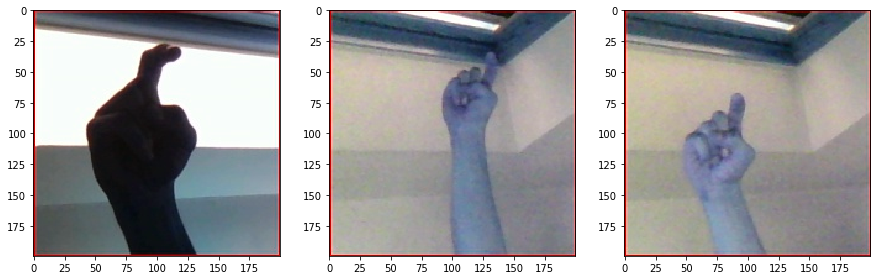

In [3]:
# Function where plot the datas
def plot(l):
    print("Letters of path " + l) # Letter that will plot 
    img_path = path + l + '/' # Path of letter
    contents = os.listdir(img_path) # Get contents of path
    plt.figure(figsize=(15, 15)) # Define a figure 
    imgs = random.sample(contents, 3) # Get 3 random datas
    
    #For to plot the 3 images
    for i in range(len(imgs)):
        img = img_path + imgs[i]
        number = int('13'+str(1+i))
        plt.subplot(number)
        plt.imshow(cv2.imread(img))
    return

plot('X') # Calling function with letter 'X'

#### Define NN model

In first layer we have 64 filters, passing (3, 3) in image and activation function is relu function, which can be seen bellow. After it we have a pooling layer with (2, 2) pool size and a dropout of 10% of datas. This goes on in the next layers, but in second and third layer we have 128 filters and in fourth we have 128 filters.

After we have a simple NN with 128, 128, 256 and 256 units per layer and, finally, the output layer with 29 units, or the number of classes which will are classified.

To finish we have the compile, already discuss before.

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = target_dims, activation = 'relu')) #First layer
model.add(MaxPooling2D(pool_size = (2, 2))) # First pooling
model.add(Dropout(0.1)) # Dropout

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = number_classes, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       1

Data generator of Keras, define by the library itself: ImageDataGenerator class will generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

In this case it's not use the many other resources of ImageDataGenerator like:
- featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
- samplewise_center: Boolean. Set each sample mean to 0.
- featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
- samplewise_std_normalization: Boolean. Divide each input by its std.
- zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
- zca_whitening: Boolean. Apply ZCA whitening.
- rotation_range: Int. Degree range for random rotations.

and others, because it was understood that it's not necessary.

In [6]:
datagen = ImageDataGenerator(rescale = 1./255, # rescale the values of image in 0 until 1
                             validation_split = val_frac) #apply the split

In [7]:
# Importing datas with ImageDataGenerator

train = datagen.flow_from_directory(path,
                                    target_size = target_size,
                                    batch_size = batch_size,
                                    shuffle = True,
                                    subset = "training")

valid = datagen.flow_from_directory(path,
                                    target_size = target_size,
                                    batch_size = batch_size,
                                    subset = "validation")

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


Define some more parameters, the steps per epoch it's good be amount of data divide by batch size, but for optimize the processing we divide this value by 5 too.

In [9]:
steps_per_epoch = (69600 // batch_size)//5
print('Steps per epoch: '+str(steps_per_epoch))
epochs = 30
validation_steps = 25

Steps per epoch: 435


Training the NN

In [10]:
model.fit_generator(train,
                    epochs = epochs,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = valid,
                    validation_steps = validation_steps)

Epoch 1/30


W0715 09:04:35.908107 140460448835392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


435/435 [==============================] - 103s 236ms/step - loss: 3.0670 - accuracy: 0.0924 - val_loss: 2.4900 - val_accuracy: 0.2313
Epoch 2/30
435/435 [==============================] - 89s 203ms/step - loss: 1.2248 - accuracy: 0.5718 - val_loss: 1.2953 - val_accuracy: 0.6175
Epoch 3/30
435/435 [==============================] - 89s 204ms/step - loss: 0.5077 - accuracy: 0.8164 - val_loss: 1.0750 - val_accuracy: 0.6875
Epoch 4/30
435/435 [==============================] - 89s 204ms/step - loss: 0.3016 - accuracy: 0.8950 - val_loss: 0.9163 - val_accuracy: 0.7575
Epoch 5/30
435/435 [==============================] - 89s 204ms/step - loss: 0.2255 - accuracy: 0.9235 - val_loss: 0.7906 - val_accuracy: 0.7713
Epoch 6/30
435/435 [==============================] - 89s 204ms/step - loss: 0.1479 - accuracy: 0.9493 - val_loss: 1.1130 - val_accuracy: 0.7013
Epoch 7/30
435/435 [==============================] - 89s 204ms/step - loss: 0.1226 - accuracy: 0.9580 - val_loss: 0.8593 - val_accuracy: 0.

Define some parameters to test

In [11]:
path_test = '../dados_test/'
list_path = os.listdir(path_test)

Function that return the letter predicted.

In [12]:
def alpha(argument):
    switcher = {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "del",
        5: "E",
        6: "F",
        7: "G",
        8: "H",
        9: "I",
        10: "J",
        11: "K",
        12: "L",
        13: "M",
        14: "N",
        15: "nothing",
        16: "O",
        17: "P",
        18: "Q",
        19: "R",
        20: "S",
        21: "space",
        22: "T",
        23: "U",
        24: "V",
        25: "W",
        26: "X",
        27: "Y",
        28: "Z"
    }
    return switcher.get(argument, "Invalid value")

Testing

Letters of path C
C


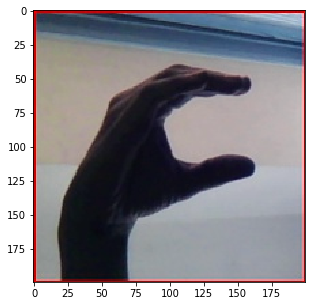

In [19]:
result = [] # Define a vector of results
l = list_path[20].split("_")[0] # Get one letter of test path
print("Letters of path " + l) # The letter

plt.figure(figsize=(5, 5)) # Define figure
img = path_test + list_path[20] # Get image to plot
plt.imshow(cv2.imread(img)) # Plotting image

test_image = image.load_img(img, target_size=(64, 64)) # Load image to predict
test_image = image.img_to_array(test_image) # Convert image to array
test_image = np.expand_dims(test_image, axis=0) #Expand the dimension of image

pred = model.predict_on_batch(test_image) # Make prediction
result.append(pred) # Get values

result = np.asarray(result) # Define the vector of result as array
imprime = np.array(result[0][0]) # Call the function of letter

print(alpha(imprime.argmax())) # Print the result

Save the model and weights

In [20]:
model_json = model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_h5.h5')